In [1]:
#猫狗分类。数据增强
#数据生成器生成测试机
from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 128
validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    '../../data/dogs-vs-cats/smallData/validation',
    target_size=(IMSIZE, IMSIZE),
    batch_size=10,
    class_mode='categorical'
)

Using TensorFlow backend.


Found 1000 images belonging to 2 classes.


In [2]:
# 利用数据增强技术生成的训练集
train_generator = ImageDataGenerator(rescale=1. / 255, shear_range=0.5, rotation_range=30,
                                     zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2
                                     ).flow_from_directory('../../data/dogs-vs-cats/smallData/train',
                                                           target_size=(IMSIZE, IMSIZE), batch_size=10,
                                                           class_mode='categorical')

Found 2000 images belonging to 2 classes.


<Figure size 432x288 with 0 Axes>

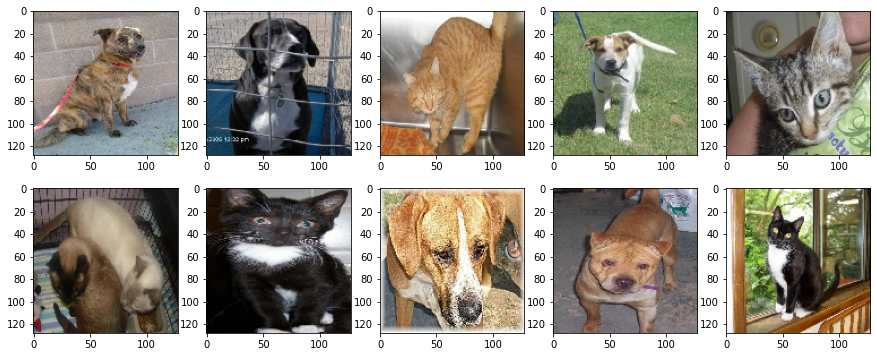

In [3]:
#展示数据增强后的图像
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(10): ax[i].imshow(X[i, :, :, ])

In [4]:
#数据增强模型
IMSIZE = 128
from keras.layers import BatchNormalization, Conv2D, Dense, Flatten, Input, MaxPooling2D
from keras import Model

n_channel = 100
input_layer = Input([IMSIZE, IMSIZE, 3])
x = input_layer
x =BatchNormalization()(x)
for _ in range(7):
    x =BatchNormalization()(x)
    x =Conv2D(n_channel,[2,2],padding='same',activation='relu')(x)
    x =MaxPooling2D([2,2])(x)

x =Flatten()(x)
x =Dense(2,activation='softmax')(x)
output_layer = x
model = Model(input_layer,output_layer)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 100)     1300      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 100)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 64, 64, 100)       400       
___________________________________________

In [5]:
#数据增强模型的编译与拟合
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=0.0001),
               metrics=['accuracy'])
model.fit_generator(train_generator,
                     epochs=200,
                     validation_data=validation_generator)


Epoch 1/200
200/200 [==============================] - 17s 87ms/step - loss: 0.7452 - accuracy: 0.5865 - val_loss: 0.9799 - val_accuracy: 0.5000
Epoch 2/200
200/200 [==============================] - 13s 64ms/step - loss: 0.6511 - accuracy: 0.6375 - val_loss: 0.7216 - val_accuracy: 0.5960
Epoch 3/200
200/200 [==============================] - 13s 66ms/step - loss: 0.6194 - accuracy: 0.6620 - val_loss: 0.6364 - val_accuracy: 0.6530
Epoch 4/200
200/200 [==============================] - 14s 69ms/step - loss: 0.6175 - accuracy: 0.6660 - val_loss: 0.4777 - val_accuracy: 0.6730
Epoch 5/200
200/200 [==============================] - 13s 63ms/step - loss: 0.5978 - accuracy: 0.6760 - val_loss: 0.4305 - val_accuracy: 0.6500
Epoch 6/200
200/200 [==============================] - 13s 66ms/step - loss: 0.5658 - accuracy: 0.7025 - val_loss: 0.6469 - val_accuracy: 0.6890
Epoch 7/200
200/200 [==============================] - 13s 64ms/step - loss: 0.5697 - accuracy: 0.6935 - val_loss: 0.6348 - val_a

KeyboardInterrupt: 